# Multimodal: Getting started Image + Text

In [1]:
import os
import sys

import json
from pprint import pprint
from IPython.display import HTML, display

current_dir = os.getcwd()
kit_dir = os.path.abspath(os.path.join(current_dir, ".."))
repo_dir = os.path.abspath(os.path.join(kit_dir, ".."))

sys.path.append(kit_dir)
sys.path.append(repo_dir)

from dotenv import load_dotenv

load_dotenv(os.path.join(repo_dir, '.env'), override=True)

True

## Pass images to the Sambanova Multimodal Models

First you will need to instantiate the SambastudioMultimodal model wrapper, and set it with the desired parameters

In [2]:
from utils.model_wrappers.multimodal_models import SambastudioMultimodal

lvlm=SambastudioMultimodal(
    model="llava-v1.5-7b", 
    temperature = 0.01,
    max_tokens_to_generate = 1024,
)

### Using an image through an URL

You can pass directly an URL containing an image to the model wrapper as shown here

In [6]:
image_url = 'https://www.freeimageslive.co.uk/files/images005/skateboard-chicken.preview.jpg'
display(HTML(f'<img src="{image_url}" style="max-height: 300px;"/>'))

response=lvlm.invoke(
        images=image_url,
        prompt="what can you see in the image?"
        )

pprint(response)

('The image shows a rooster standing on a skateboard. The background appears '
 'to be a grassy area, possibly a park, with some scattered leaves on the '
 'ground. The rooster is positioned in the center of the skateboard, and the '
 'scene is well-lit, suggesting it is daytime.')


### Using a file path

You can pass the absolute path of your image to the model wrapper as shown here

In [9]:
image_path = os.path.join(kit_dir,"data/sample_docs/sample.png")
display(HTML(f'<img src="{image_path}" style="max-height: 300px;"/>'))

response = lvlm.invoke(
    images=image_path,
    prompt="what is the title of the plot?"
    )

pprint(response)

'The title of the plot is "Number of Birds on a Tree vs Time of the day."'


### Using a Base 64 image

You are also able to sent to the model wrapper images encoded in base64, this can be useful when having in memory images


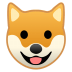

'The image is of a dog emoji.'


In [10]:
b64_image="iVBORw0KGgoAAAANSUhEUgAAAEgAAABICAMAAABiM0N1AAAACXBIWXMAAA7EAAAOxAGVKw4bAAADAFBMVEVHcEzvqTrupTbxqzzSkE7wqjvupjf+9+AAAAD+67LtpDTsozPzsELroC/89d71tEb2tkj28NnUkk/nmCf+gYHlliOueTzTkU7TkU6wfT66gUHUkU7UkU7WlE/uqkLUkk/enk/7wFbTkU6UaDSvez7Ukk7UklDTkU7Vk03jnkL43q7IiUjTkUvQkE3TkU7rrFG4f0XVlUrjok3TkU7amU/mp1HOkUnQj01eQBJlRRTnp07UklDiok/Zl07ToWzhoFHan0rTkk8+PTjUkk7WlE7UkU6Tj4FfXVixekL2tkzZnU7hoU9iMjIxMCz+6rCYTU2fbSKTZB7ckyg7KAvHiClzThfXlk7qzqVycW3q0ars38XWzLTRj03+67H56s0EAgFRT0jPaWk7EOLy7EP/+OHqni7TkU8AAADvqDjyrD7/7LP0sUPyrj/sojLzr0D4t0rmlyX1skT58tzr5dD3tUf07dfy69XllSPu6NLjkR74uUvp483nmCfkkyHpnSzwqjr8wFPomyrpnCvtpDP/goLm4Mvj3cnYlk7roC8XFxbg28bOybbb1cHQy7j6vE//9+AtLSz+9t7W0b3Y0783NzdVVVVCQkDd2MTxqzzvpjfupTbUz7vWlE7SzblLS0siIiLUl1kODQz38NnamU/4uVB9em7rpUHh0LL6xGH7vlH2tEb65LvyxoL+9NnnnTXnpk3Vml0dEQkdHBrDvq0pGwdSNw/YlEnrqkzemEHXnmLaoWb6zHUFAgLHwrEJBwb+4p7LxrOhnZDTlFTssly+uanlxJr4xGX0uFPxs1ELCglnZFv+6a3SuZeFgnbPv6X11Z/87Mr56crwv3LenU771IP+5aUkFBPRvp/83ZYkIyDQroXcyamaloj0zZD3wF/+gYHSpXT7yWr+6KrmdXW9X191ThXWjiWIXR18UhWtdCDmv5Dw1rG2saHtsFXVtY2AQUHaqnTjo1GzW1v2fHy6gCi5gCj98tb+67Leu5D+6rA8Hh54PT3PaWlHcEzjsQDwpuBYd+XqAAABAHRSTlMA/v7+/v7+/v7+/v7+///+/v7+/v7+EOz4CSGTnPH+1qL+0QMXpsqIe/7+T2FH5f4vUf6001E8aP7+Yd1r5v6SJa/+usJ2/v4+/jN//v7+/v7+/v7+/vn+/v7+/lj+/v7+/v7/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////AP/+1Ae1twAABvhJREFUWMPVmHdUU1ccx1GfJhEQDCtCiEDYKggoaBFQnLj3bEt7DlxaEJVaR2NFQAGxNghWO4xtkF32Xo0M2Xsp7r336G7/6H0reYNItP+0n3N+7/zu9/7e9928vHfvuU9L67/LVAufhW92xkIfi6lsdQZAEL7POM1txlnwEQTMYMnmsqYnyWDKTE19Zk4Byc1NMnPmpScA54gIyxfAfKqGN8IcvLCMiHAGkxgd9qA5AuLM5y/SxGcR4Duj9c3AntEjBCmZKM2xwGLIGyW2ALFNWHkTMGP0zQLSzBvV/RGZKclgjvEQRhYgGV62v7oqUwpsGH2z+VJpNS+4OkOa0oeobrnY1N3lHYiLu6mY1IxRH6nl+WBeGzSazTCylUmlS3mw74Y0xRWYL7KGJ0z1mbIWPhQIGghYO8ViBryA9QwvJNlPmnEWFvMspbI5DCMrmUTKQ/uW3pBIyviA7+WFPiaxfa55eWV5eXmufbHQD5h7wS5XP0nGTaw4QyKzZRiNj5VYYn28PzIkEr+8ZJks2bXMT0LBrzmvD6p5ULSEPmhxo0RmxTLamhKMc1aydSjOE6WNW2PZRvop+IiCeVf19T/Vx4OekK0UopDXqM8akZVM3480atTY6CrbyFamp78U72/z09P7UQ8PeqJsVRNGlnqsf22OLCysDf/hVWFD0vgbXpoSxnqO3EBICPZo8PpDNKAKH5FeCJjFMLIBOjrnYd97VSE6kBAi6Aml1dgGi2/q6LBeESEQbennBZ+9ukVDmuB9Or9FxHpp7YBos19Vo85mjdG5WtW0WQTsWPNR2sdvQRqYyzDyAGkjRoz4hgg1CVtOAxNZU63DyJEj9xGhJmHLDmACw2gBcBg2bNg+ItQkbNkBTGYYWYPyj96CcsCaTU1KR40a9S0RahK2XGrC9DEWlA4fPvw7ItQkbLlUwBzRROAwevTo/USoSdiyA+tfswG52tra+4nQ/nn6tOWh2lQFO4Qunzb9F5rMekWcSkMp3AuClOiGMtAtQfV7VKnUie5jCsp1IQfxWO0fxOVyg1aoFPywApP9V1PkcmBKfx6R8kDIQTzWcLEzVqkU/LAKk7lrKHI54kJ/1ZDcQF2RKDQQowQ3KghkUIAbleCtUJFINzAXoS/+QqTXMYfDScjqDQwPD5+OGxWHMyjGjabDNLA3K4HDyXHsRYSMCTIhACcrLSrqQRDGnSgGd3D9QVRUWhZRngDc6HO/PJ4DCYDRnRYZWYJeunhlJIOVxeiISiIj07qJYk5APn2pHV8RQBoFZEUaGNwvLph21wDyORH44e60guL7BgbhWQFKo4rxNCNPihEnm3G+yohoZXNURpWezBGp+DV322vJzaEUM0Zkmx+vGhEn22ibkREW9IRoZXMoI2LcIzf+GIpRj9EueAYa9IRodVOMEvj0hc0M6aEYccr2kmw7c2VDevq6K867lFIZpZDTg9DXIw/kEdWoizzpTLdi/THIekWWM6l1UY0eIfR5ZDJ4SLmBAfFnPkPZeyW+9hhBbUL2Xkw8E0+tfMiYtMUmldQRcXJQp1xHTtH3Soo4jrlQfJJDK6x0Yk1s70M5ngh4cMzugqfMP65kPrTvynYk+/HoAULWutYwhk3MVxRiBiloYG0hxCYVn7A5eoTCYXb/qXxPMXMZsUM2jB17aiweZLLD9wclvjvY/euQuaxtgbWgcucOgnk1ZFZfGEdQ+JjUai6T2c4Kk0F2G3ZIw06C+Un1ZFq/JAnjwmNSKUpqJdOGQQYEl0gn+cbdOCdOx9UQ6e49tR9cKPTtiCHbJ+NOJxLpxjrPQTdS74Ln2wlag+KKtg+KojColcyfs/4ycquFNOzBOZHEbUmNIRpFly/XEGlMRws3KZFo/I6YqdmGGXvWpUfjpMI5NS5VER196PISdCXwrT0cHV2TWgjlDqLkErBSt0MULxTI02MwDh1Blwtu3IVzi5fd/vvD28sWn7sQh0lLDuEV6XUmpuq3hi5IfvohjPoWdL1IenntAMG1Z9gK0lKP96fLBe6v22R6QKevMeahlz9neMDQEAvDA8uwNW0e3ntJLpj0+u2qByK/dBgjFRr531IZLUaNUvG+gbqhfOBDIKhrP4qR6s/lPlMa3ToNfVOxjsSnfBP3obf07k7I9U2JKLVxXP/bhNGrP+Gtr8XkTd6IlakmHwesZwN5+wkURWvST3/dgvf71ctzQUmtCkx8WgeEmn5C8TAH3p0nURQdxwsLCgpaCo93KDBhoAI4uWj8IUZsbYMg3gNf4tQUFdUQabs3IjAz1noTJrshIP9i5xcUOi/KgUBoqvWmTDYzAUB+/WL7QGfnQPvF63IAnOze3Ab7pjRB6Kn8EoGMN5sk/hcfzKwXeNjb2dlPXGCs9X/jHzMYd+WLYIc6AAAAAElFTkSuQmCC"
display(HTML(f'<img src="data:image/png;base64,{b64_image}" style="max-height: 300px;"/>'))
response = lvlm.invoke(
    images=b64_image,
    prompt="which animal is in the image?"
    )
pprint(response)

## Prompting your model to perform specific tasks

For some specific task you can do some prompt engineering in order to improve the quality if the model responses

In [14]:
image_url="https://cdn4.picryl.com/photo/2010/01/01/american-vintage-cars-line-up-near-the-havana-cuba-capitol-and-chinatown-in-3-1024.jpg"
display(HTML(f'<img src={image_url} style="max-height: 300px;"/>'))

In [18]:
response = lvlm.invoke(
    images=image_url,
    prompt="How many cars are in the image?"
    )
pprint(response)

'There are ten cars in the image.'


In this case we can se an hallucinated output 
Now lets prompt the model to think step by step and perform as an expert counting system

In [20]:
count_prompt = ("You are an expert counting system, " 
                "How many cars are in the image? " 
                "think step by step in and analyze every part of the image Before providing the answer "
                "you must finalize with Answer:<count>")

response = lvlm.invoke(
    images=image_url,
    prompt=count_prompt
    )

pprint(response)

('1. Start from the left side of the image.\n'
 '2. Identify the first car (white car).\n'
 '3. Move to the right and identify the second car (maroon car).\n'
 '4. Continue to the right and identify the third car (green car).\n'
 '5. Continue to the right and identify the fourth car (blue car).\n'
 '6. Continue to the right and identify the fifth car (light blue car).\n'
 '7. Continue to the right and identify the sixth car (blue car).\n'
 '8. Continue to the right and identify the seventh car (red car).\n'
 '9. Continue to the right and identify the eighth car (brown car).\n'
 '10. Continue to the right and identify the ninth car (brown car).\n'
 '\n'
 'Answer: 9')


We can see the model now is "thinking" identifying each car before giving a final count

This technic is also useful in cases when you need plot and chart understanding

In [25]:
image_path = image=os.path.join(kit_dir,"data/sample_docs/sample.png")
display(HTML(f'<img src={image_path} style="max-height: 300px;"/>'))

In [28]:
response = lvlm.invoke(
    images=image_path,
    prompt="how many birds have been seen before 7am?"
    )
pprint(response)

('Before 7 AM, the graph shows a data point at 6 AM. At 6 AM, the number of '
 'birds seen is 30. Therefore, 30 birds have been seen before 7 AM.')


Lets ask the model again to perform with a different role and thinking step by step

In [27]:
response = lvlm.invoke(
    images=image_path,
    prompt="You are an expert chart and plot reader think step by step before giving an answer to the following question: how many birds have been seen before 7am?"
    )
pprint(response)

('To determine how many birds have been seen before 7am, we need to look at '
 'the data points on the graph that correspond to times before 7am. \n'
 '\n'
 '1. Identify the x-axis, which represents the time of the day.\n'
 '2. Locate the point on the x-axis that corresponds to 6AM.\n'
 '3. Observe the y-axis value at 6AM, which represents the number of birds '
 'seen at that time.\n'
 '\n'
 'From the graph:\n'
 '- At 6AM, the number of birds seen is 20.\n'
 '\n'
 'Therefore, the number of birds seen before 7am is 20.')


## Prompting the model with image reference

This is a typical call to the model in which we pass an image and the query as a text prompt

In [31]:
image_path = image=os.path.join(kit_dir,"data/sample_docs/sample2.jpg")
display(HTML(f'<img src={image_path} style="max-height: 300px;"/>'))

response =  lvlm.invoke(
    images=image_path,
    prompt="whats the function of the mitochondria?"
    )

pprint(response)

('The mitochondria, often referred to as the "powerhouses of the cell," are '
 'organelles responsible for producing energy. They generate adenosine '
 "triphosphate (ATP), the cell's main energy currency, through a process "
 'called oxidative phosphorylation, which is part of cellular respiration. '
 'This process involves the breakdown of glucose and other nutrients in the '
 'presence of oxygen to produce ATP, water, and carbon dioxide. Mitochondria '
 'also play roles in other cellular processes, such as signaling, cellular '
 'differentiation, and cell death, as well as maintaining control of the cell '
 'cycle and cell growth.')


But we can also highlight or underline information in the image combined with the prompt to get specific responses 

In [32]:
image_path = image=os.path.join(kit_dir,"data/sample_docs/sample2highlight.jpg")
display(HTML(f'<img src={image_path} style="max-height: 300px;"/>'))

response = lvlm.invoke(
    images=image_path,
    prompt="whats the function of the highlighted organelle"
    )

pprint(response)

('The highlighted organelle in the image is the mitochondrion. The primary '
 'function of mitochondria is to generate adenosine triphosphate (ATP), which '
 'is the main energy currency of the cell. This process is known as cellular '
 'respiration. Mitochondria are also involved in other important cellular '
 'processes such as the regulation of the cell cycle and cell growth, '
 'signaling, and apoptosis (programmed cell death).')


We can even ask the question directly in the image 

In [40]:
image_path = image=os.path.join(kit_dir,"data/sample_docs/sample2question.jpg")
display(HTML(f'<img src={image_path} style="max-height: 300px;"/>'))

response = lvlm.invoke(images=image_path)
pprint(response)

('The image is a labeled diagram of a yeast cell. The part in question, '
 'indicated by the text "What\'s the function of this?" and pointing to the '
 'vacuole, has the following functions:\n'
 '\n'
 '### Vacuole Functions:\n'
 '1. **Storage**: Vacuoles store nutrients, waste products, and other '
 'substances. In yeast cells, they can store amino acids, ions, and other '
 'small molecules.\n'
 '2. **Detoxification**: Vacuoles help in detoxifying the cell by sequestering '
 'harmful substances.\n'
 '3. **pH Homeostasis**: They maintain the internal pH of the cell by '
 'sequestering protons (H+ ions).\n'
 '4. **Degradation**: Vacuoles contain hydrolytic enzymes that break down '
 'macromolecules, similar to the lysosomes in animal cells.\n'
 '5. **Osmoregulation**: They help in regulating the osmotic balance by '
 'controlling the flow of water in and out of the cell.\n'
 '\n'
 'In summary, the vacuole is a multifunctional organelle crucial for storage, '
 'detoxification, pH balance

## Transcribing and structuring documents

The SambaNova multimodal models can be used also to transcribe text and tables from documents 


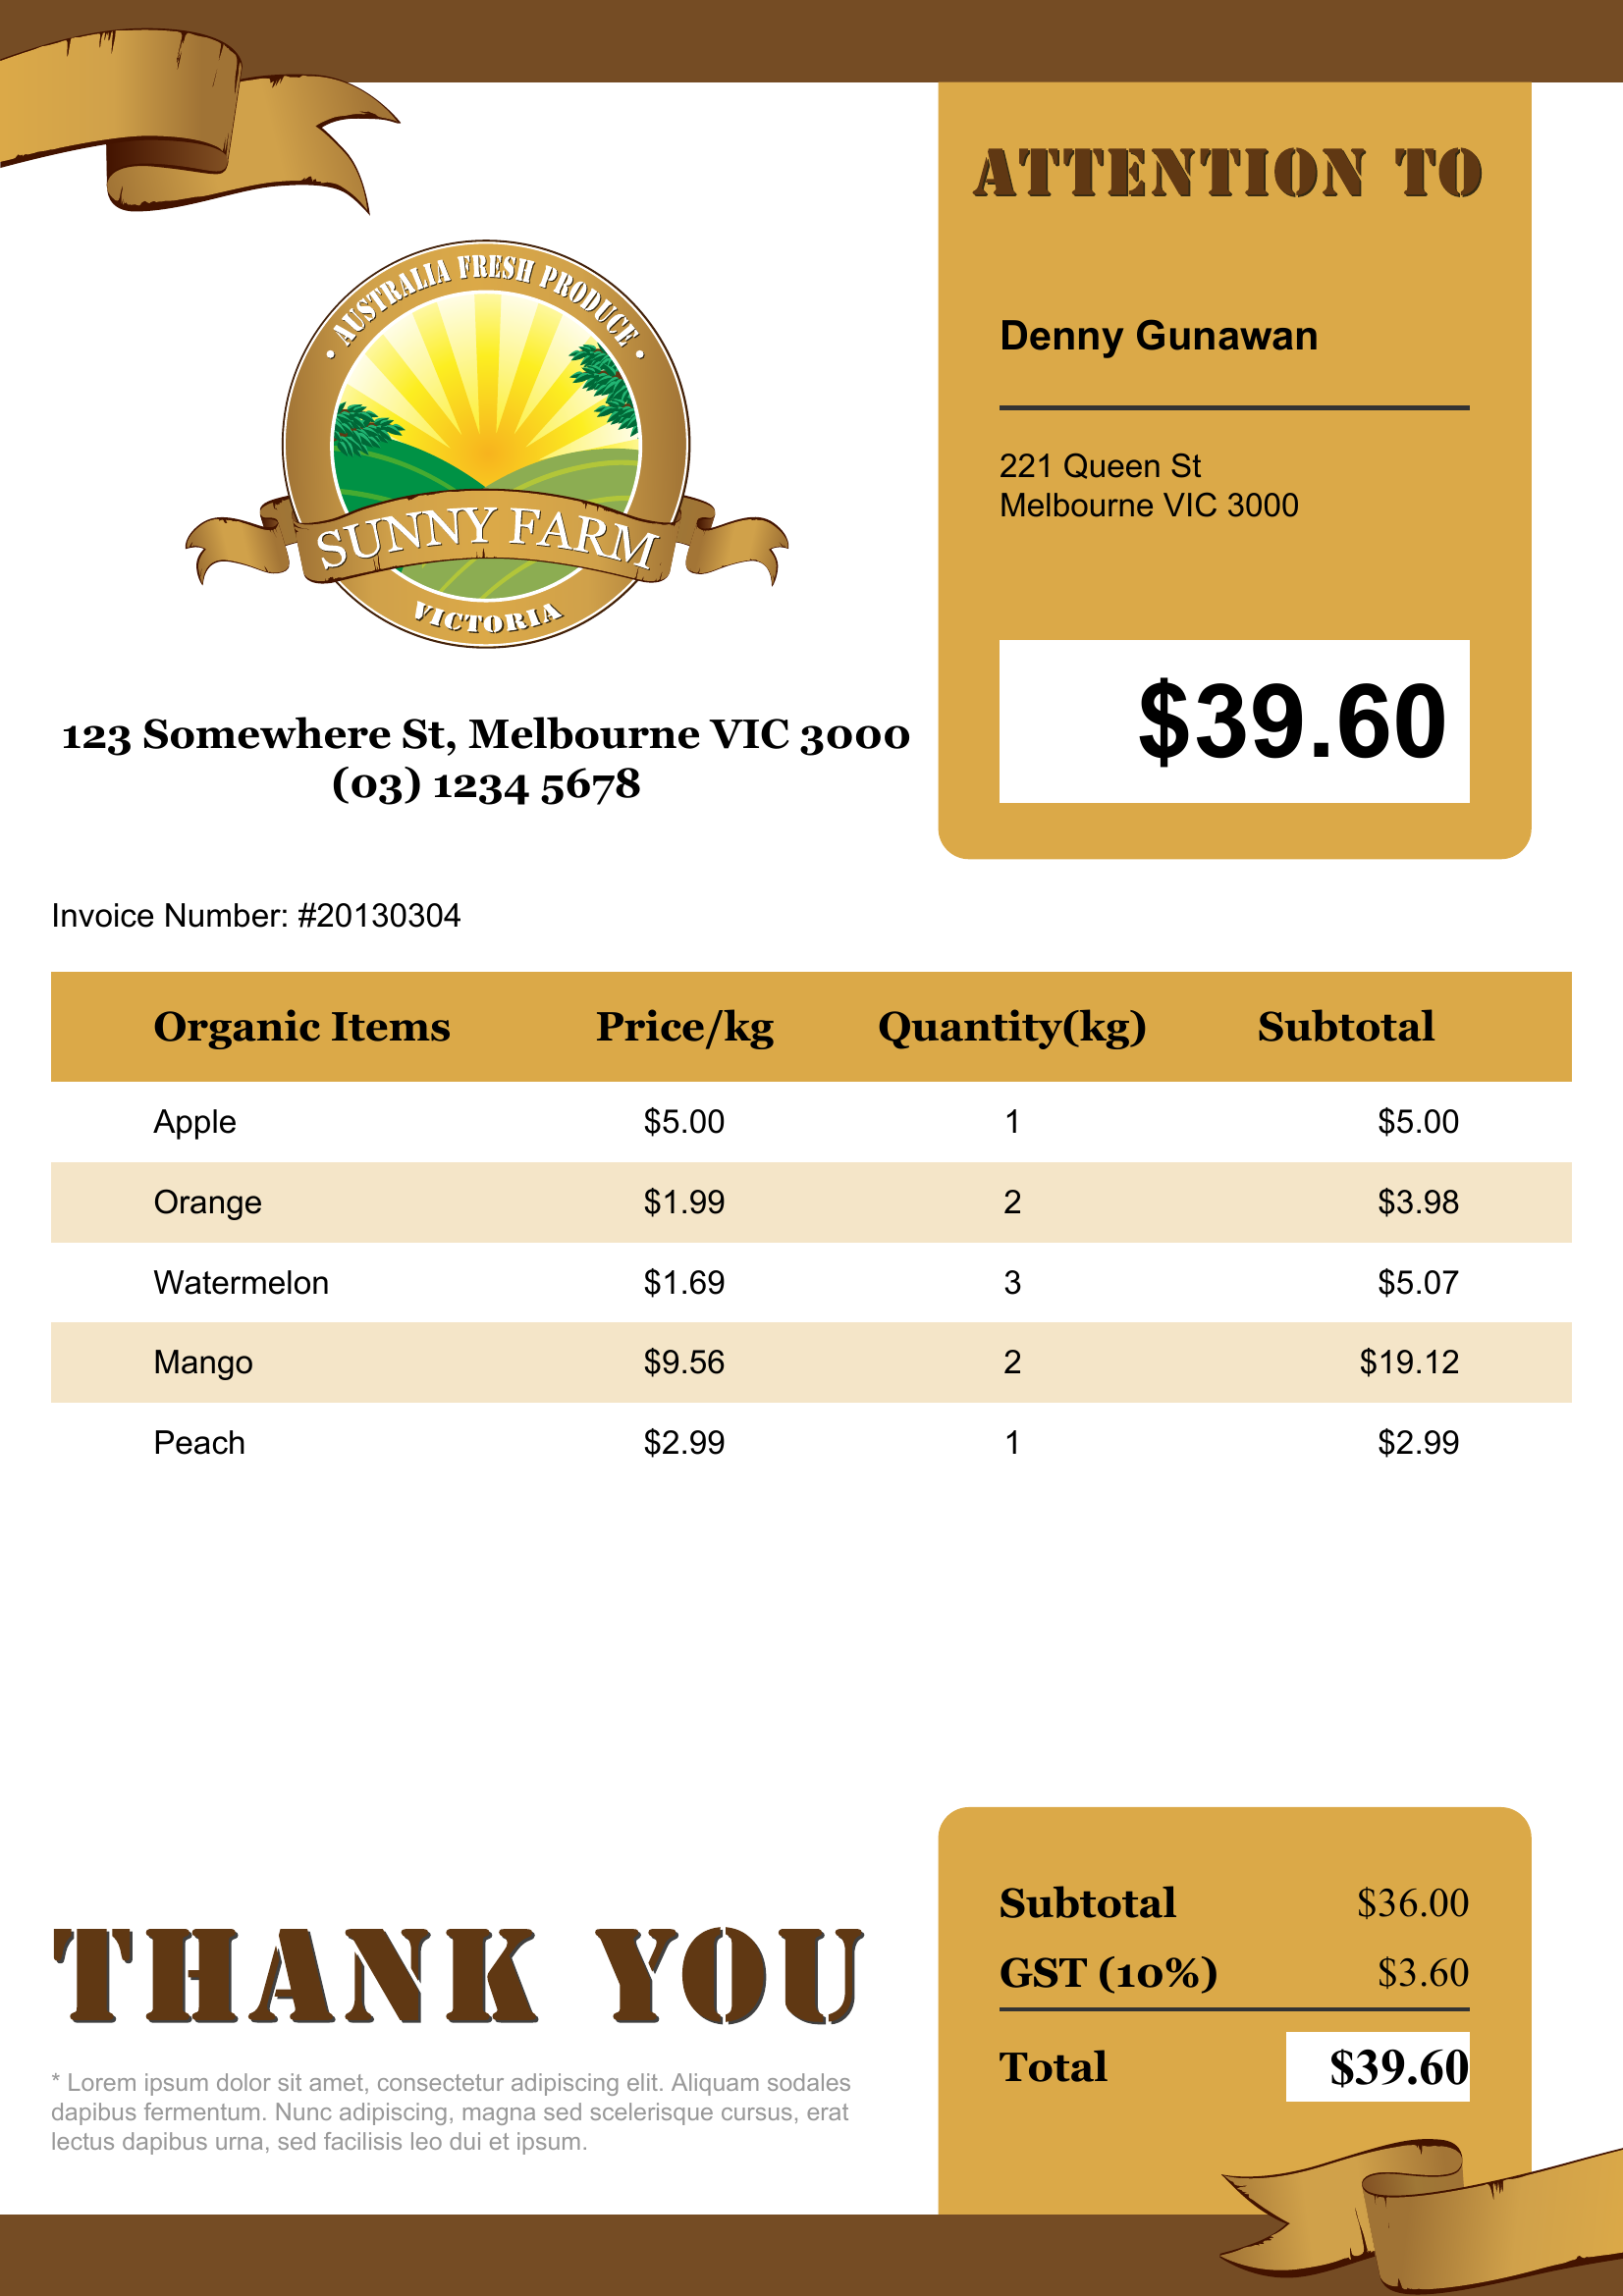

In [43]:
# load PDF document as image in memory
from pdf2image import convert_from_path
import base64
from io import BytesIO

images = convert_from_path(os.path.join(kit_dir,"data/sample_docs/invoicesample.pdf"))

# get first page and convert the image to base64
image = images[0]
buffered = BytesIO()
image.save(buffered, format="PNG")
b64_img = base64.b64encode(buffered.getvalue()).decode()

display(HTML(f'<img src="data:image/png;base64,{b64_img}" style="max-height: 450px;"/>'))

In [48]:
response = lvlm.invoke(
    images=b64_img,
    prompt="transcribe the text in the image"
    )
pprint(response)
       

('ATTENTION TO\n'
 '\n'
 'Denny Gunawan\n'
 '\n'
 '221 Queen St\n'
 'Melbourne VIC 3000\n'
 '\n'
 '$39.60\n'
 '\n'
 '123 Somewhere St, Melbourne VIC 3000\n'
 '(03) 1234 5678\n'
 '\n'
 'Invoice Number: #20130304\n'
 '\n'
 '| Organic Items | Price/kg | Quantity(kg) | Subtotal |\n'
 '|---------------|----------|--------------|----------|\n'
 '| Apple         | $5.00    | 1            | $5.00    |\n'
 '| Orange        | $1.99    | 2            | $3.98    |\n'
 '| Watermelon    | $1.69    | 3            | $5.07    |\n'
 '| Mango         | $9.56    | 2            | $19.12   |\n'
 '| Peach         | $2.99    | 1            | $2.99    |\n'
 '\n'
 'THANK YOU\n'
 '\n'
 '* Lorem ipsum dolor sit amet, consectetur adipiscing elit. Aliquam sodales '
 'dapibus fermentum. Nunc adipiscing, magna sed scelerisque cursus, erat '
 'lectus dapibus urna, sed facilisis leo dui et ipsum.\n'
 '\n'
 '| Subtotal | $36.00 |\n'
 '|----------|--------|\n'
 '| GST (10%)| $3.60  |\n'
 '| Total    | $39.60 |')


We can even ask the model to transcribe some structured documents like forms

In [49]:
image_url = 'https://global.discourse-cdn.com/bubble/original/3X/4/a/4adf3c255f411eaba5bbd1cf2bcd2da5e7ec919d.jpeg'
display(HTML(f'<img src="{image_url}" style="max-height: 300px;"/>'))

response = lvlm.invoke(
    images=image_url,
    prompt="transcribe the form in the image the output shoud be in json format including each field as key: value"
)
print(response)

```json
{
  "Date": "9/14/19",
  "Name": "Sally Walker",
  "DOB": "09/04/1986",
  "Address": "24 Barney Lane",
  "City": "Towaco",
  "State": "NJ",
  "Zip": "07082",
  "Email": "sally.walker@gmail.com",
  "Phone": "(906) 917-3486",
  "Gender": "F",
  "Marital Status": "Single",
  "Occupation": "Software Engineer",
  "Referred By": "None",
  "Emergency Contact": "Eva Walker",
  "Emergency Contact Phone": "(906) 334-8926",
  "Medical Concerns": "runny nose, mucus in throat, weakness, aches, chills, tired"
}
```


we can after perform a basic parsing to access to the form fields

In [50]:
def parse_json(str_input):
    json_response = str_input.replace("```json","")
    json_response = json_response.replace("```","")
    json_response = json_response.strip()
    return json.loads(json_response)

In [51]:
form = parse_json(response)
form["Date"]

'9/14/19'

## Passing multiple images to the model

Some cases like comparisons requires the model to analyze more than one image at time, several images can be passed as a list of paths, Urls, or base64 encoded images 

In [53]:
image_paths = [os.path.join(kit_dir,"data/sample_docs/sample2.jpg"),os.path.join(kit_dir,"data/sample_docs/sample2highlight.jpg")]

display(HTML(f'<div style="display: flex;"><img src="{image_paths[0]}" style="max-height: 300px; margin-right: 10px;"/><img src="{image_paths[1]}" style="max-height: 300px;"/>'))


response = lvlm.invoke(
    images=image_paths,
    prompt="what is the difference between this two images?"
    )

pprint(response)

('The primary difference between the two images is that the second image has a '
 'yellow circle drawn around one of the mitochondria. Other than that, the '
 'images are identical, showing the same labeled components of a cell.')
